<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

# Funciones avanzadas en pandas (pero muy útiles)

En esta notebook vamos a ver ejemplos de datos en formato long y en formato wide, y cómo transformarlos de uno al otro. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

In [43]:
# Con esto hacemos los gráficos más grandes, adecuados para las presentaciones.
seaborn.set_context(context='talk', font_scale=1.5)

In [44]:
## TODO: Cambiar la dirección del conjunto de datos de acuerdo a dónde lo guardaron
dataset = pandas.read_csv('datos/Dataset AyVD 2020.csv')

In [45]:
dataset.columns = ['timestamp', 'gender', 'age', 'zodiac_sign', 'profession', 'junior_programmer_salary', 'senior_programmer_salary']

In [46]:
dataset

,timestamp,gender,age,zodiac_sign,profession,junior_programmer_salary,senior_programmer_salary
0,31/03/2020 17:10:01,Mujer,27,Tauro,Programadora,40000,80000
1,12/05/2020 15:19:14,Mujer,40,Acuario,Docente investigadora,50000,90000
2,13/05/2020 13:43:48,Hombre,22,Géminis,Estudiante de Astronomía,25000,60000
3,13/05/2020 18:12:04,Mujer,23,Cáncer,profesora,32000,50000
4,14/05/2020 16:30:09,Hombre,33,Capricornio,Docente investigador,60000,80000
...,...,...,...,...,...,...,...
83,15/05/2020 18:55:53,Hombre,28,Picis,Data Engineer,60000,140000
84,15/05/2020 19:11:15,Otro,45,Géminis,Diseño gráfico,68000,80000
85,15/05/2020 19:11:46,Prefiero no decirlo,9,Libra,lksadaokpoqwe,3,4
86,15/05/2020 20:58:25,Prefiero no decirlo,44,NaN,profesor,40000,120000


## Group by

Los tipos de gráficos que hemos visto calculan estimadores para grupos de valores automáticamente. Por ejemplo, si realizamon un gráfico de barra con el parámetro `hue='gender'`, se calcula la media por cada uno de los valores de `gender`, y luego se dibuja cada barra utilizando ese valor.

En pandas se puede realizar la misma operación explícitamente a través de un *agrupado* de datos, usando la función `groupby`, y subsecuentemente un *agregado* de los datos en cada uno de los grupos. Las funciones de agregado son muy variadas: `sum`, `count`, `mean` e incluso nuevas funciones definidas por el usuario. Veamos un ejemplo.

In [47]:
dataset.groupby(["gender", "zodiac_sign", "profession"]).mean()

age  \
gender              zodiac_sign profession                       
Hombre              Acuario     investigador-docente      33.0   
                    Aries       Director                  41.0   
                                Estudiante de ingeniería  27.0   
                                Ingeniero de Software     24.0   
                                Programador               24.0   
...                                                        ...   
Otro                Géminis     Diseño gráfico            45.0   
Prefiero no decirlo Libra       Lic. en Química           45.0   
                                lksadaokpoqwe              9.0   
                                psicologo                 33.0   
                    Virgo       estudiante                22.0   

                                                          junior_programmer_salary  \
gender              zodiac_sign profession                                           
Hombre              Acuario     investigador-docente                       60000.0   
                    Aries       Director                                   60000.0   
                                Estudiante de ingeniería                   50000.0   
                                Ingeniero de Software                      50000.0   
                                Programador                                40000.0   
...                                                                            ...   
Otro                Géminis     Diseño gráfico                             68000.0   
Prefiero no decirlo Libra       Lic. en Química                            45000.0   
                                lksadaokpoqwe                                  3.0   
                                psicologo                                  60000.0   
                    Virgo       estudiante                                 30000.0   

                                                          senior_programmer_salary  
gender              zodiac_sign profession                                          
Hombre              Acuario     investigador-docente                       80000.0  
                    Aries       Director                                  120000.0  
                                Estudiante de ingeniería                   90000.0  
                                Ingeniero de Software                     100000.0  
                                Programador                                65000.0  
...                                                                            ...  
Otro                Géminis     Diseño gráfico                             80000.0  
Prefiero no decirlo Libra       Lic. en Química                            80000.0  
                                lksadaokpoqwe                                  4.0  
                                psicologo                                 100000.0  
                    Virgo       estudiante                                 40000.0  

[83 rows x 3 columns]

Vemos que las columnas que utilizamos para agrupar ahora son parte del índice, y que todas las columnas restantes fueron agregadas.

## Ejercicio 1

Agrupen los valores por género y agréngenlos usando la función `median`. Luego, utilicen esos datos para hacer un gráfico de barras que compare las medias de distintos grupos. Pista: usen la función `reset_index` para trabajar más cómodamente con los datos.

### Agrupamos valores por género usando MEDIAN.

In [48]:
data_gender_median = dataset.groupby(["gender"]).median().reset_index()
data_gender_median

,gender,age,junior_programmer_salary,senior_programmer_salary
0,Hombre,30.5,50000.0,80000.0
1,Mujer,30.0,50000.0,80000.0
2,Otro,45.0,68000.0,80000.0
3,Prefiero no decirlo,33.0,40000.0,80000.0


### Graficamos valores anteriores para comparar ambos grupos

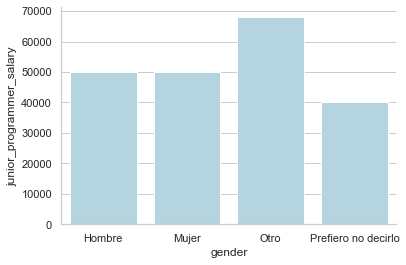

In [49]:
seaborn.set(style="whitegrid")

seaborn.barplot(data=data_gender_median, x='gender', y='junior_programmer_salary', color='lightblue')
seaborn.despine()

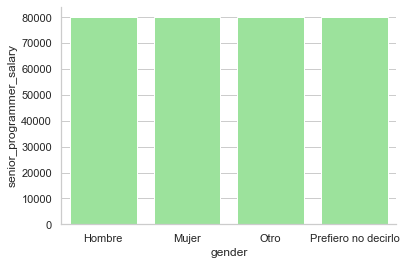

In [50]:
seaborn.barplot(data=data_gender_median, x='gender', y='senior_programmer_salary', color='lightgreen')
seaborn.despine()

## Formatos long y wide

El tipo de formato de un dataset puede ser `long` o `wide`. Esto hace referencia a la forma que toma para representar la misma información: en el caso de `wide`, el dataset tiene muchas columnas, y en el caso de `long` tiene muchas filas.

En nuestro dataset, luego de agrupar los datos nos queda un formato long. Tomemos un ejemplo:

In [51]:
long_dataset = dataset.groupby(["gender", "zodiac_sign"]).mean()[
    ['junior_programmer_salary', 'senior_programmer_salary']]
long_dataset

junior_programmer_salary  \
gender              zodiac_sign                             
Hombre              Acuario                  60000.000000   
                    Aries                    48000.000000   
                    Capricornio              56000.000000   
                    Cáncer                   59250.000000   
                    Escorpio                 48580.714286   
                    Géminis                  31250.000000   
                    Leo                      57500.000000   
                    Libra                    48888.888889   
                    Picis                    53125.000000   
                    Sagitario                42500.000000   
                    Tauro                    30000.000000   
                    Virgo                    49000.000000   
Mujer               Acuario                  45000.000000   
                    Aries                    68333.333333   
                    Cáncer                   32000.000000   
                    Escorpio                 45000.000000   
                    Géminis                  70000.000000   
                    Leo                      52500.000000   
                    Libra                    51666.666667   
                    Picis                    57500.000000   
                    Sagitario                42200.000000   
                    Tauro                    40000.000000   
                    Virgo                    50000.000000   
Otro                Géminis                  68000.000000   
Prefiero no decirlo Libra                    35001.000000   
                    Virgo                    30000.000000   

                                 senior_programmer_salary  
gender              zodiac_sign                            
Hombre              Acuario                  80000.000000  
                    Aries                    88000.000000  
                    Capricornio              96000.000000  
                    Cáncer                   91500.000000  
                    Escorpio                 82875.714286  
                    Géminis                  56250.000000  
                    Leo                      87500.000000  
                    Libra                    71111.111111  
                    Picis                   188125.000000  
                    Sagitario                60000.000000  
                    Tauro                    60000.000000  
                    Virgo                    83000.000000  
Mujer               Acuario                  80000.000000  
                    Aries                    90000.000000  
                    Cáncer                   50000.000000  
                    Escorpio                 66666.666667  
                    Géminis                 210000.000000  
                    Leo                      85000.000000  
                    Libra                    83333.333333  
                    Picis                    77500.000000  
                    Sagitario                68000.000000  
                    Tauro                    80000.000000  
                    Virgo                    80000.000000  
Otro                Géminis                  80000.000000  
Prefiero no decirlo Libra                    60001.333333  
                    Virgo                    40000.000000

En este caso, tenemos una fila por cada valor de `zodiac_sign`, pero podríamos crear una columna distinta para cada signo, y utilizar el valor de la estimación de salario para rellenar la celda correspondiente. En pandas, esta operación se realiza con la función `pivot`. Notar que debemos elegir aquí si quedarnos con la columna de las estimaciones para junior o para senior, no podemos elegir ambas.

In [52]:
wide_dataset = long_dataset.reset_index().pivot(index='gender', columns='zodiac_sign',
                                                values='junior_programmer_salary')
wide_dataset

zodiac_sign,Acuario,Aries,Capricornio,Cáncer,Escorpio,Géminis,Leo,Libra,Picis,Sagitario,Tauro,Virgo
gender,,,,,,,,,,,,
Hombre,60000.0,48000.000000,56000.0,59250.0,48580.714286,31250.0,57500.0,48888.888889,53125.0,42500.0,30000.0,49000.0
Mujer,45000.0,68333.333333,NaN,32000.0,45000.000000,70000.0,52500.0,51666.666667,57500.0,42200.0,40000.0,50000.0
Otro,NaN,NaN,NaN,NaN,NaN,68000.0,NaN,NaN,NaN,NaN,NaN,NaN
Prefiero no decirlo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35001.000000,NaN,NaN,NaN,30000.0


Por otra parte, las estimaciones de salario se podrían considerar en formato `wide`. Para usar el formato long, tendríamos que tener una única columna `estimation`, y otra que nos describa el tipo de la estimación (junior o senior). Esto se logra en pandas con la función `melt`.

In [53]:
data_test = pandas.melt(long_dataset.reset_index(), id_vars=['gender', 'zodiac_sign'],
            value_vars=['junior_programmer_salary', 'senior_programmer_salary'],
            var_name='estimation_type', value_name='estimation')

Esto es importante porque las herramientas de visualización como seaborn utilizan el formato `long`. Ahora podemos realizar con un solo comando un gráfico de barras que compare las estimaciones para junior y senior utilizando el parámetro `hue='estimation_type'`.

## Ejercicio 2

Realizar dicho gráfico de barras.

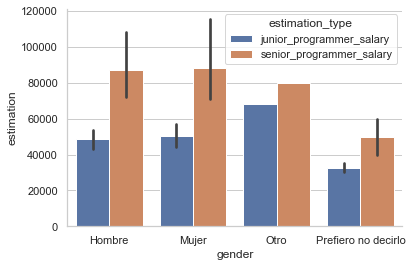

In [55]:
seaborn.barplot(data=data_test, x='gender', y='estimation', hue='estimation_type')
seaborn.despine()

## Ejercicio 3

Utilizar la función `melt` junto con la función `cut` para comparar en un gráfico de línea las estimaciones de distintos grupos etáreos para seniors y juniors.

In [134]:
data_3 = pandas.melt(dataset.reset_index(), id_vars=['age'], 
                    value_vars=['junior_programmer_salary', 'senior_programmer_salary'],
                    var_name='estimacion_tipo', value_name='estimacion_salarial')

In [135]:
data_3

,age,estimacion_tipo,estimacion_salarial
0,27,junior_programmer_salary,40000
1,40,junior_programmer_salary,50000
2,22,junior_programmer_salary,25000
3,23,junior_programmer_salary,32000
4,33,junior_programmer_salary,60000
...,...,...,...
171,28,senior_programmer_salary,140000
172,45,senior_programmer_salary,80000
173,9,senior_programmer_salary,4
174,44,senior_programmer_salary,120000


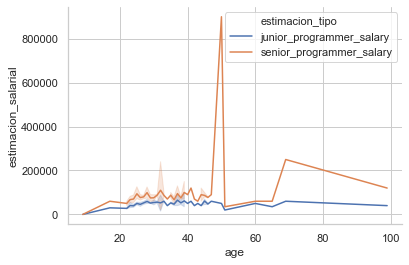

In [136]:
seaborn.lineplot(x='age', y='estimacion_salarial', hue='estimacion_tipo', data=data_3)
seaborn.despine()

In [137]:
bins = pandas.IntervalIndex.from_tuples([(0, 20), (21, 30), (31, 40), (41, 50), (51, 100)])

edades = pandas.cut(data_3.age, bins).reset_index()

data_3['age_interval'] = edades['age']

In [138]:
data_3

,age,estimacion_tipo,estimacion_salarial,age_interval
0,27,junior_programmer_salary,40000,"(21, 30]"
1,40,junior_programmer_salary,50000,"(31, 40]"
2,22,junior_programmer_salary,25000,"(21, 30]"
3,23,junior_programmer_salary,32000,"(21, 30]"
4,33,junior_programmer_salary,60000,"(31, 40]"
...,...,...,...,...
171,28,senior_programmer_salary,140000,"(21, 30]"
172,45,senior_programmer_salary,80000,"(41, 50]"
173,9,senior_programmer_salary,4,"(0, 20]"
174,44,senior_programmer_salary,120000,"(41, 50]"


gender                   object
age                       int64
estimacion_tipo          object
estimacion_salarial       int64
age_interval           category
dtype: object

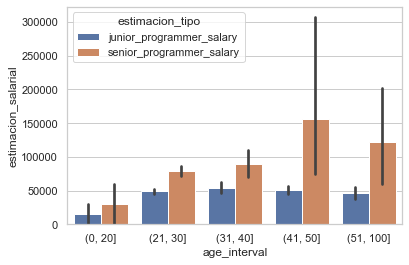

In [140]:
seaborn.barplot(data=data_3, x='age_interval', y='estimacion_salarial', hue='estimacion_tipo')

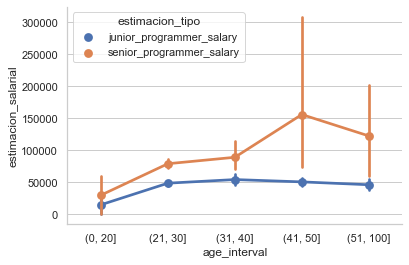

In [146]:
data_3['age_interval'].astype(str)
seaborn.pointplot(data=data_3, x='age_interval', y='estimacion_salarial', hue='estimacion_tipo')
seaborn.despine()